In [1]:
# Выбрать файл данных - "ebw_data.csv"
from google.colab import files
files.upload()

Saving ebw_data.csv to ebw_data.csv


{'ebw_data.csv': b'"IW","IF","VW","FP","Depth","Width"\n"47","139","4.5","80","1.60","2.54"\n"47","139","4.5","80","1.62","2.50"\n"47","139","4.5","80","1.68","2.60"\n"47","139","4.5","80","1.58","2.52"\n"45","140","4.5","80","1.76","2.48"\n"45","140","4.5","80","1.72","2.48"\n"45","140","4.5","80","1.64","2.52"\n"45","140","4.5","80","1.64","2.56"\n"45","140","8.0","80","1.20","2.00"\n"45","140","8.0","80","1.20","1.96"\n"45","140","8.0","80","1.16","1.96"\n"45","140","8.0","80","1.20","1.96"\n"45","141","10.0","80","0.98","1.84"\n"45","141","10.0","80","1.02","1.84"\n"45","141","10.0","80","1.04","1.90"\n"45","141","10.0","80","1.00","1.86"\n"46","141","10.0","80","1.20","1.78"\n"46","141","10.0","80","1.00","1.84"\n"46","141","10.0","80","1.20","1.86"\n"46","141","10.0","80","1.16","1.80"\n"47","141","12.0","80","1.12","1.71"\n"47","141","12.0","80","1.08","1.68"\n"47","141","12.0","80","1.20","1.80"\n"47","141","12.0","80","1.08","1.72"\n"47","134","10.0","110","0.96","2.00"\n"47",

In [45]:
# Подключить библиотеку Pandas для чтения *.csv-файла данных
import pandas as pd

# Выполнить чтение файла в таблицу df
df = pd.read_csv('ebw_data.csv')

In [15]:
# Вывести первые 5 строк в наборе данных
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [19]:
# Убедиться, что в наборе нет отсутствующих значений
df.isnull().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

В наборе данных нет отсутствующих значений

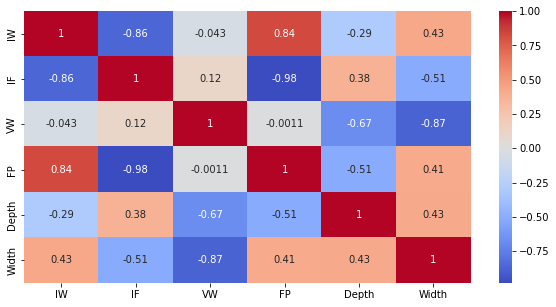

In [20]:
# Создать новую фигуру 10 х 5
plt.figure(figsize=(10,5))

# Отобразить тепловую карту с отображением коэффициентов для матрицы корреляции набора данных
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Наибольшую корреляцию с целевыми переменными имеет атрибут `VW` – с увеличением скорости сварки длина и ширина сварного шва уменьшаются

In [46]:
# Удалить атрибуты "Depth" и "Width", создав два новых набора данных
df1 = df.copy()
df2 = df.copy()
df1.drop(columns='Depth', axis=1, inplace=True)
df2.drop(columns='Width', axis=1, inplace=True)

In [23]:
# Вывести первые 5 строк в первом наборе данных
df1.head()

,IW,IF,VW,FP,Width
0,47,139,4.5,80,2.54
1,47,139,4.5,80,2.50
2,47,139,4.5,80,2.60
3,47,139,4.5,80,2.52
4,45,140,4.5,80,2.48


In [24]:
# Вывести первые 5 строк во втором наборе данных
df2.head()

,IW,IF,VW,FP,Depth
0,47,139,4.5,80,1.60
1,47,139,4.5,80,1.62
2,47,139,4.5,80,1.68
3,47,139,4.5,80,1.58
4,45,140,4.5,80,1.76


## Предсказание ширины

In [47]:
# Выполнить разбиение данных на обучающий и тестовый набор
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df1, random_state=117, test_size=0.2)

In [48]:
# Скопировать целевую переменную в y, а остальное – в X:
y_train = X_train['Width'].copy()
X_train = X_train.drop(['Width'], axis=1)

y_test = X_test['Width'].copy()
X_test = X_test.drop(['Width'], axis=1)

In [49]:
# Импортировать Ridge-регрессию и GridSearchCV для подбора оптимальных параметров
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Создать словарь параметров для перебора всех возможных комбинаций
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}

# Построить линейную регрессионную модель – Ridge-регрессию - подобрав оптимальные параметры
model1 = GridSearchCV(Ridge(), tuned_params, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

# Обучить оптимальную модель на обучающей выборке
model1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [50]:
# Вывести лучшие найденные параметры модели
model1.best_estimator_

Ridge(alpha=1)

In [51]:
# Выполнить предсказание – получить прогноз модели на тестовых данных
pred = model1.predict(X_test)

In [52]:
# Получить результаты работы модели (метрики MAE, MSE, RMSE, R-squared)
from math import sqrt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

print("Результаты Ridge-регрессии на тестовой выборке:\n")
print("RMSE: ", sqrt(mse(y_test.values, pred)))
print("R-squared: ", r2_score(y_test.values, pred))
print("MAE: ", mae(y_test.values, pred))
print('MSE:', mse(y_test.values, pred))

Результаты Ridge-регрессии на тестовой выборке:

RMSE:  0.06428384567292757
R-squared:  0.9560722237478895
MAE:  0.05000149868223696
MSE: 0.004132412814500769


## Предсказание глубины

In [55]:
X_train2, X_test2 = train_test_split(df2, random_state=45, test_size=0.2)

y_train2 = X_train2['Depth'].copy()
X_train2 = X_train2.drop(['Depth'], axis=1)

y_test2 = X_test2['Depth'].copy()
X_test2 = X_test2.drop(['Depth'], axis=1)

In [56]:
model2 = GridSearchCV(Ridge(), tuned_params, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)
model2.fit(X_train2, y_train2)

print(model2.best_estimator_)
pred2 = model2.predict(X_test2)

print("Результаты Ridge-регрессии на тестовой выборке:\n")
print("RMSE: ", sqrt(mse(y_test2.values, pred2)))
print("R-squared: ", r2_score(y_test2.values, pred2))
print("MAE: ", mae(y_test2.values, pred2))
print('MSE:', mse(y_test2.values, pred2))

Ridge(alpha=0.0001)
Результаты Ridge-регрессии на тестовой выборке:

RMSE:  0.1052247286861428
R-squared:  0.7838503163747412
MAE:  0.07931200775543648
MSE: 0.011072243527072364


## Визуализация результатов

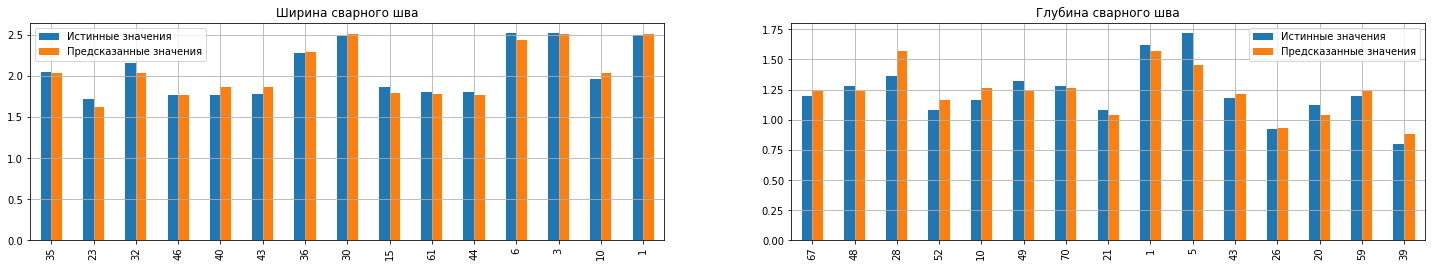

In [57]:
import matplotlib.pyplot as plt

y_w = pd.DataFrame({'Истинные значения': y_test, 'Предсказанные значения': pred})
y_d = pd.DataFrame({'Истинные значения': y_test2, 'Предсказанные значения': pred2})

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25, 4))
ax = ax.flatten()
y_w.plot(kind='bar', title='Ширина сварного шва', grid=True, ax=ax[0])
y_d.plot(kind='bar', title='Глубина сварного шва', grid=True, ax=ax[1])

plt.show()